**Kernel PCA examples with clustering**

**Making half moon samples**

[0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1]


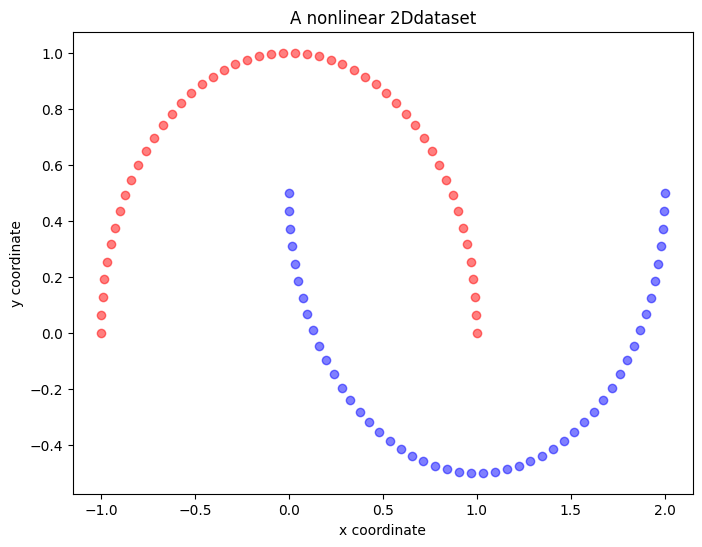

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123) # Make two interleaving half circles.
# print(X)
print(y)
# X_1 = X[y==0]
# X_2 = X[y==0]
# print(X_1)
# print(X_2)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

# plt.scatter(X_1[:, 0], X_1[:,1], color='red', alpha=0.5)
# plt.scatter(X_2[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

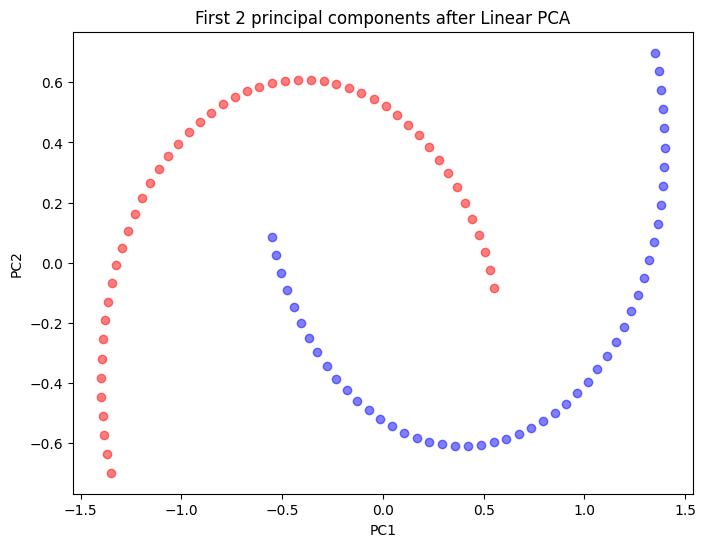

In [2]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

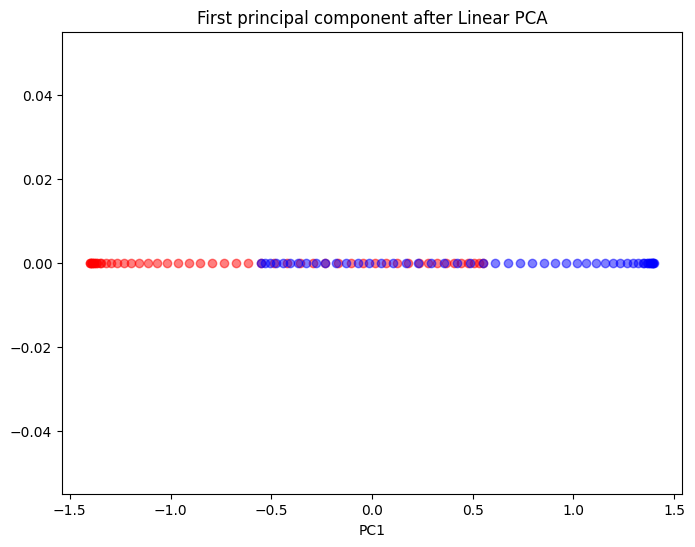

In [3]:
import numpy as np
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

**As we can see, the resulting principal components do not yield a subspace where the data is linearly separated well**

**Let's use kernel PCA on this dataset**

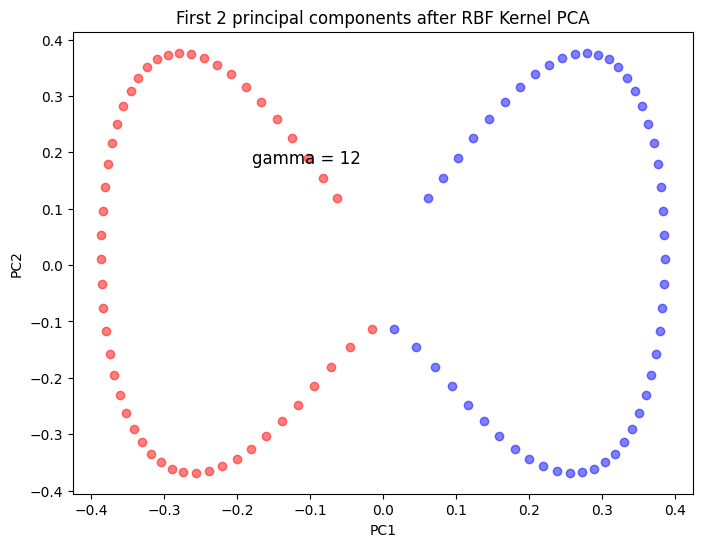

In [4]:
# X_pc = stepwise_kpca(X, gamma=15, n_components=2)
gamma_value = 12
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=gamma_value)

X_kpca_rbf = kpca_rbf.fit_transform(X)
# print(X_kpca_rbf)
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], X_kpca_rbf[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca_rbf[y==1, 0], X_kpca_rbf[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, f'gamma = {gamma_value}', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**How about the first principal component**


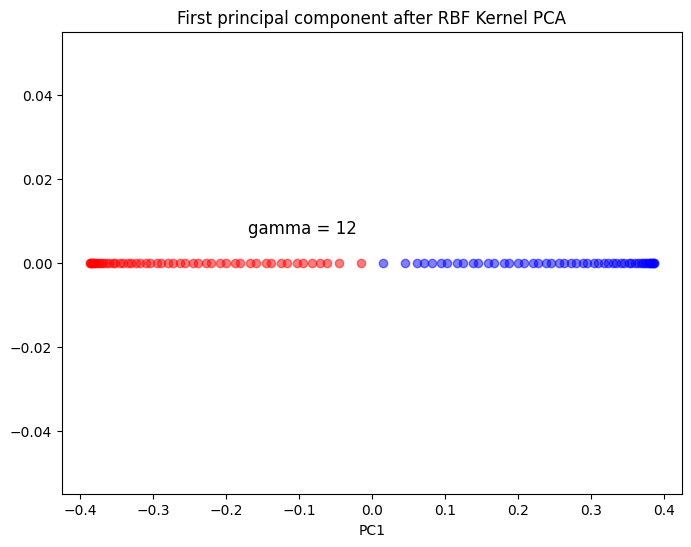

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], np.zeros((50)), color='red', alpha=0.5) # alpha is the blending value
plt.scatter(X_kpca_rbf[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, f'gamma = {gamma_value}', fontsize=12)
plt.xlabel('PC1')
plt.show()

**Let's try to do some clustering on this reduced dimensional dataset.**

**Let's take the first principal component and do some clustering**

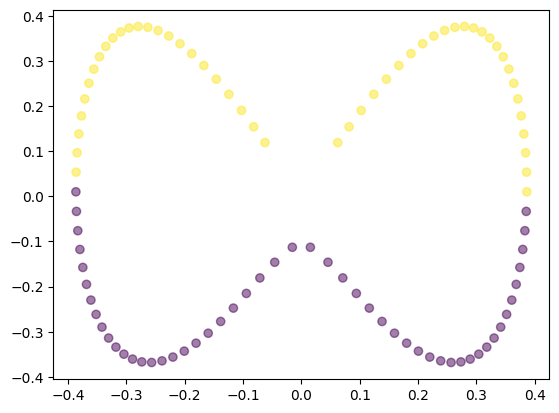

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X_kpca_rbf)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=kmeans.labels_, alpha=0.5) # alpha is the blending value

**This did not give a good clustering**

1.0
0.7256258914873848


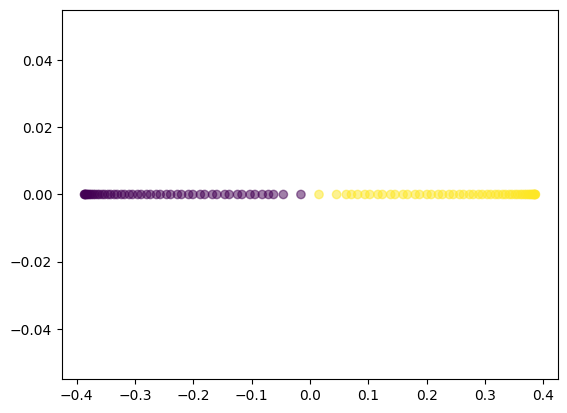

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# print(type(X_kpca_rbf[:,0]))
# print(len(X_kpca_rbf[:,0].reshape(-1,1)))
kmeans.fit(X_kpca_rbf[:,0].reshape(-1,1)) # Need to reshape the data 
plt.scatter(X_kpca_rbf[:,0], np.zeros((len(X_kpca_rbf[:,0]))), c=kmeans.labels_, alpha=0.5) # alpha is the blending value
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(y, kmeans.labels_))
print(silhouette_score(X_kpca_rbf[:,0].reshape(-1,1), kmeans.labels_))

**Let's make some circles**

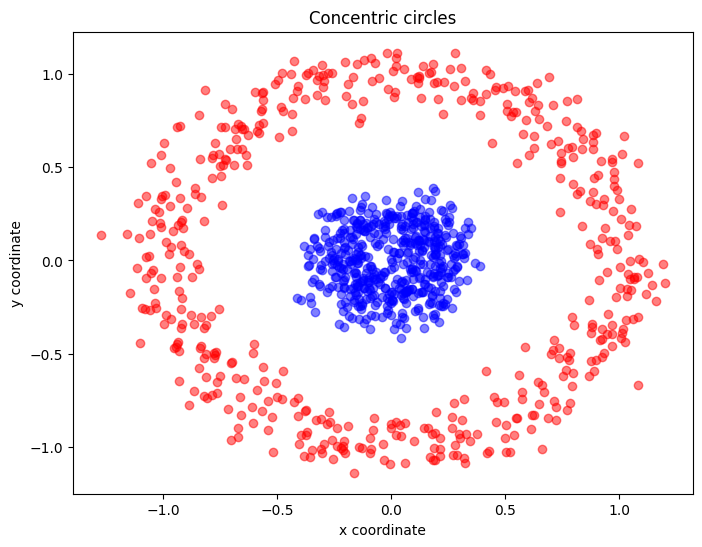

In [8]:
from sklearn.datasets import make_circles
 
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)  # Make a large circle containing a smaller circle in 2d.
# print(y) # y is a mask to denote which circle point belongs to
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

**Let's do linear PCA and see what happens**

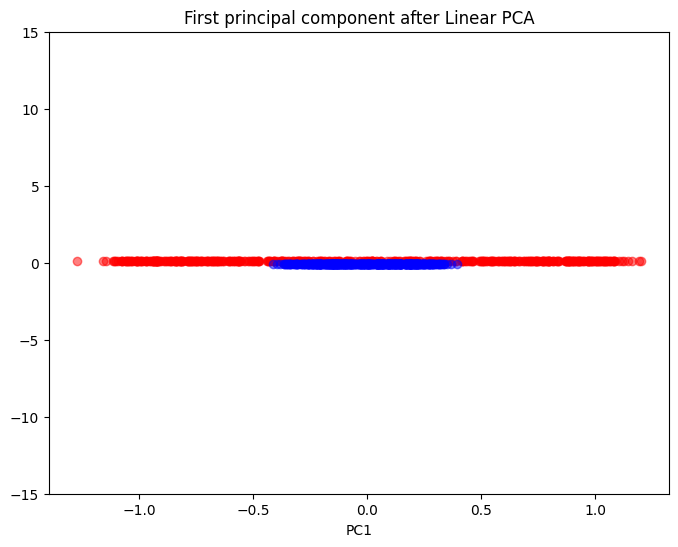

In [9]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)  # addeed a slight increment to see the points clearly
plt.scatter(X[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5) # addeed a slight decrement to see the points clearly
plt.ylim([-15,15])
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

**Let's try this on a gaussian kernel**

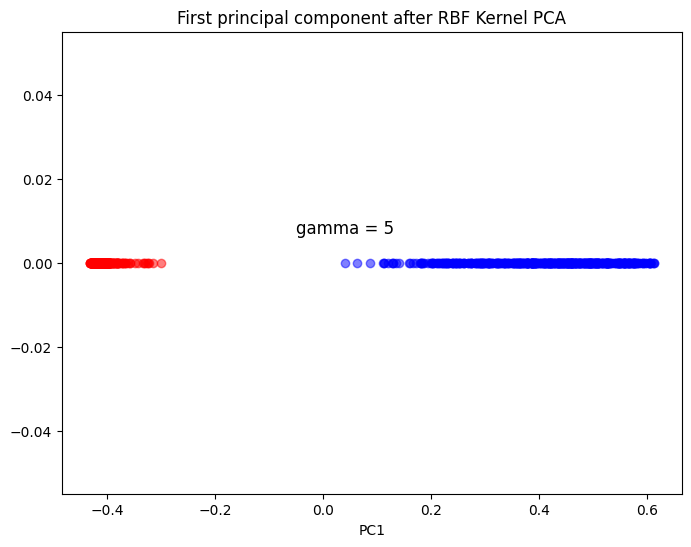

In [10]:
gamma_value = 5
kpca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=gamma_value)
X_kpca_rbf = kpca_rbf.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_kpca_rbf[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_kpca_rbf[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, f'gamma = {gamma_value}', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

**Let's do some clustering here**

**Let's use DBSCAN, eventhough kmeans would do fine.**

**Note that for the original dataset, DBSCAN works fine, this is purely just an example show case the kernel trick**

1.0
0.9042229281267282


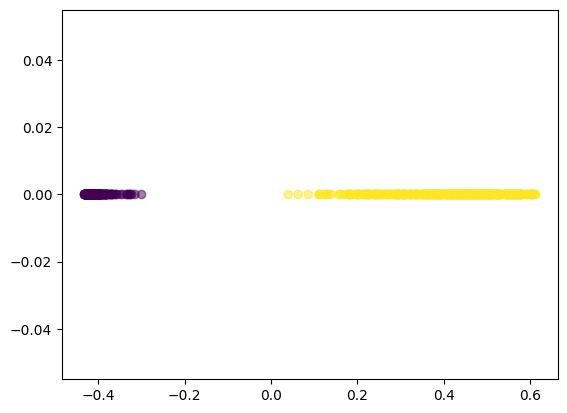

In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.15, min_samples=5)
reshaped_X_kpca_rbf = X_kpca_rbf[:,0].reshape(-1,1)
pred_labels = db.fit_predict(reshaped_X_kpca_rbf)
plt.scatter(reshaped_X_kpca_rbf, np.zeros((1000,1)), c=db.labels_, alpha=0.5)
print(v_measure_score(y, db.labels_))
print(silhouette_score(reshaped_X_kpca_rbf, db.labels_))